In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | bollnas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | kushiro
Processing Record 15 of Set 1 | taltal
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | khryashchevka
Processing Record 18 of Set 1 | quarai
Processing Record 19 of Set 1 | ayan
Processing Record 20 of Set 1 | bereda
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | finschhafen
Processing Record 

Processing Record 36 of Set 4 | severo-yeniseyskiy
Processing Record 37 of Set 4 | biak
Processing Record 38 of Set 4 | salym
Processing Record 39 of Set 4 | ahuimanu
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | lac du bonnet
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | adrar
Processing Record 44 of Set 4 | chibuto
Processing Record 45 of Set 4 | port moresby
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | hambantota
Processing Record 49 of Set 4 | longyearbyen
Processing Record 50 of Set 4 | tutoia
Processing Record 1 of Set 5 | idaho falls
Processing Record 2 of Set 5 | bundibugyo
Processing Record 3 of Set 5 | jamestown
Processing Record 4 of Set 5 | andenes
Processing Record 5 of Set 5 | tchibanga
Processing Record 6 of Set 5 | athabasca
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5

Processing Record 25 of Set 8 | marcona
City not found. Skipping...
Processing Record 26 of Set 8 | concepcion
Processing Record 27 of Set 8 | asayita
City not found. Skipping...
Processing Record 28 of Set 8 | sao lourenco do sul
Processing Record 29 of Set 8 | ponta pora
Processing Record 30 of Set 8 | caravelas
Processing Record 31 of Set 8 | peniche
Processing Record 32 of Set 8 | mitu
Processing Record 33 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 8 | moron
Processing Record 35 of Set 8 | mhlambanyatsi
Processing Record 36 of Set 8 | vedaranniyam
City not found. Skipping...
Processing Record 37 of Set 8 | blagoyevo
Processing Record 38 of Set 8 | ust-kuyga
Processing Record 39 of Set 8 | chagda
City not found. Skipping...
Processing Record 40 of Set 8 | sumbawanga
Processing Record 41 of Set 8 | strizhi
Processing Record 42 of Set 8 | okato
Processing Record 43 of Set 8 | dunedin
Processing Record 44 of Set 8 | fairbanks
Processing Record 45 of Set 8 | bograd

Processing Record 7 of Set 12 | hudson
Processing Record 8 of Set 12 | camacupa
Processing Record 9 of Set 12 | aseri
Processing Record 10 of Set 12 | pundaguitan
Processing Record 11 of Set 12 | sabzevar
Processing Record 12 of Set 12 | hovd
Processing Record 13 of Set 12 | sovetskiy
Processing Record 14 of Set 12 | santa luzia
Processing Record 15 of Set 12 | sainte-maxime
Processing Record 16 of Set 12 | eucaliptus
Processing Record 17 of Set 12 | ust-koksa
Processing Record 18 of Set 12 | conceicao do araguaia
Processing Record 19 of Set 12 | yulara
Processing Record 20 of Set 12 | benguela
Processing Record 21 of Set 12 | port hedland
Processing Record 22 of Set 12 | lebedinyy
Processing Record 23 of Set 12 | vegreville
Processing Record 24 of Set 12 | kisangani
Processing Record 25 of Set 12 | timra
Processing Record 26 of Set 12 | anori
Processing Record 27 of Set 12 | mitsamiouli
Processing Record 28 of Set 12 | krasnoarmeysk
Processing Record 29 of Set 12 | mbanza-ngungu
Proce

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,82.94,76,88,13.02,KI,2021-07-14 05:55:20
1,Ushuaia,-54.8000,-68.3000,29.86,80,0,8.05,AR,2021-07-14 05:51:42
2,Qaanaaq,77.4840,-69.3632,38.25,87,100,1.32,GL,2021-07-14 05:55:21
3,Punta Arenas,-53.1500,-70.9167,32.11,93,75,3.44,CL,2021-07-14 05:55:21
4,Mataura,-46.1927,168.8643,47.48,81,100,8.41,NZ,2021-07-14 05:55:22
5,Bethel,41.3712,-73.4140,69.91,93,90,0.00,US,2021-07-14 05:55:22
6,Lavrentiya,65.5833,-171.0000,48.76,85,76,6.08,RU,2021-07-14 05:55:23
7,Tuktoyaktuk,69.4541,-133.0374,46.40,76,75,14.97,CA,2021-07-14 05:55:23
8,Bollnas,61.3482,16.3946,72.39,62,56,2.08,SE,2021-07-14 05:55:24
9,Rikitea,-23.1203,-134.9692,73.74,70,2,11.79,PF,2021-07-14 05:55:24


In [12]:
#Reorder columns
city_data_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]

city_data_df = city_data_df[city_data_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-14 05:55:20,3.0707,172.7902,82.94,76,88,13.02
1,Ushuaia,AR,2021-07-14 05:51:42,-54.8000,-68.3000,29.86,80,0,8.05
2,Qaanaaq,GL,2021-07-14 05:55:21,77.4840,-69.3632,38.25,87,100,1.32
3,Punta Arenas,CL,2021-07-14 05:55:21,-53.1500,-70.9167,32.11,93,75,3.44
4,Mataura,NZ,2021-07-14 05:55:22,-46.1927,168.8643,47.48,81,100,8.41
5,Bethel,US,2021-07-14 05:55:22,41.3712,-73.4140,69.91,93,90,0.00
6,Lavrentiya,RU,2021-07-14 05:55:23,65.5833,-171.0000,48.76,85,76,6.08
7,Tuktoyaktuk,CA,2021-07-14 05:55:23,69.4541,-133.0374,46.40,76,75,14.97
8,Bollnas,SE,2021-07-14 05:55:24,61.3482,16.3946,72.39,62,56,2.08
9,Rikitea,PF,2021-07-14 05:55:24,-23.1203,-134.9692,73.74,70,2,11.79


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

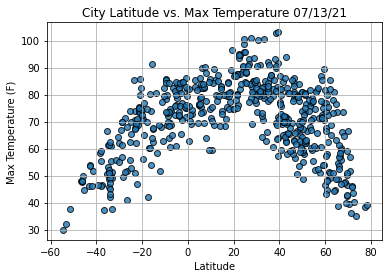

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


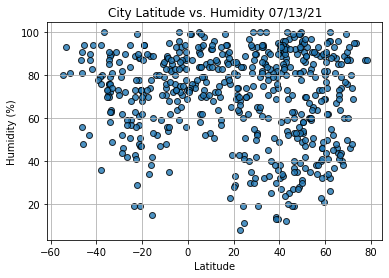

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

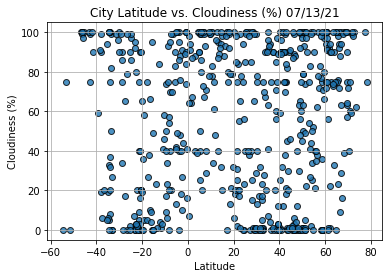

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

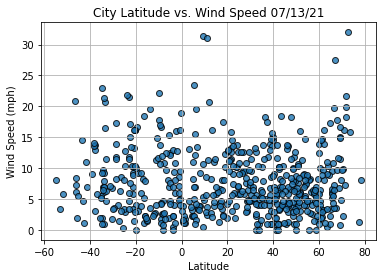

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Taltal
Country                        CL
Date          2021-07-14 05:55:26
Lat                         -25.4
Lng                      -70.4833
Max Temp                    55.85
Humidity                       84
Cloudiness                      2
Wind Speed                   0.34
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
553    False
554    False
555     True
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-07-14 05:55:20,3.0707,172.7902,82.94,76,88,13.02
2,Qaanaaq,GL,2021-07-14 05:55:21,77.4840,-69.3632,38.25,87,100,1.32
5,Bethel,US,2021-07-14 05:55:22,41.3712,-73.4140,69.91,93,90,0.00
6,Lavrentiya,RU,2021-07-14 05:55:23,65.5833,-171.0000,48.76,85,76,6.08
7,Tuktoyaktuk,CA,2021-07-14 05:55:23,69.4541,-133.0374,46.40,76,75,14.97


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

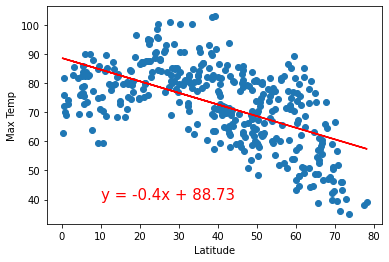

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

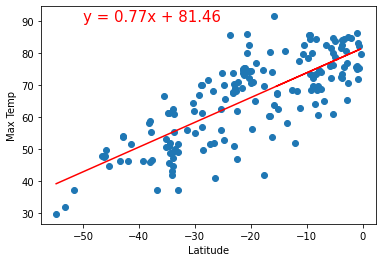

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

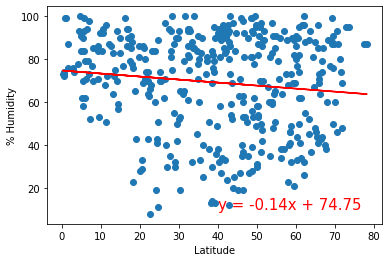

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


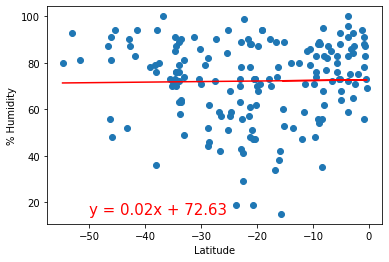

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

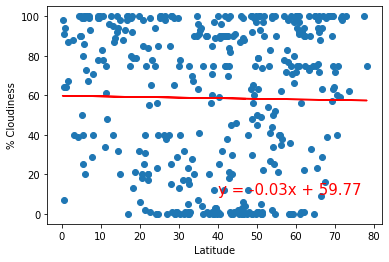

In [28]:
plot_linear_regression
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \
                        for % Cloudiness", "% Cloudiness",(40,10))


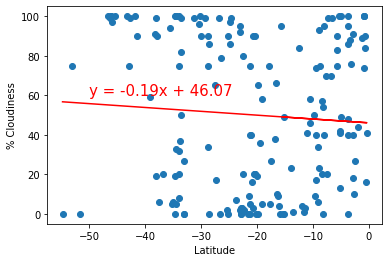

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

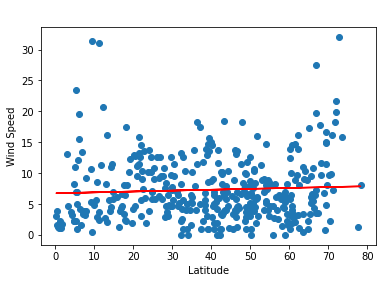

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

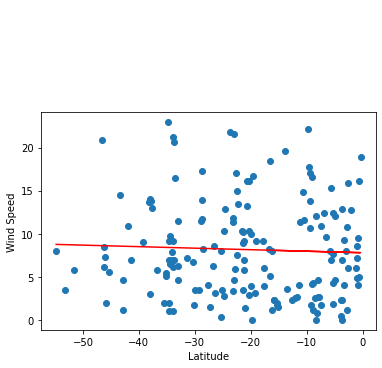

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))